# Analysis of Video Game Sales

### Content
+ Introduction: Video Game Sales
+ Data description and objectives
+ Formulation of research question
+ Data preparation: cleaning and shaping
+ Data visualization and analysis
+ Conclusion

## 1. Introduction: Video Game Sales

A video game is an electronic game that involves interaction with a user interface or input device, such as a joystick, controller, keyboard, or motion sensing devices, to generate visual feedback on a two- or three-dimensional video display device such as a TV set, monitor, touchscreen, or virtual reality headset. Video games are augmented with audio feedback from speakers or headphones, and optionally with other types of feedback systems including haptic technology.

Video games are defined based on their platform, which include arcade games, console games, and PC games. More recently, the industry has expanded onto mobile gaming through smartphones and tablet computers, virtual and augmented reality systems, and remote cloud gaming. Video games are classified into a wide range of genres based on their type of gameplay and purpose.

Since the 2010s, the commercial importance of the video game industry has been increasing. The emerging Asian markets and mobile games on smartphones in particular are driving the growth of the industry. As of 2018, video games generated sales of US$134.9 billion annually worldwide,[1] and were the third-largest segment in the U.S. entertainment market, behind broadcast and cable TV.

Source(https://en.wikipedia.org/wiki/Video_game)

## 2. Data description

The dataset contains a list of video games with sales greater than 100,000 copies. My analysis includes information of video game sales in different period of time. There are a big variety of platforms that make releases, genres and publishers across the world and I am interested in analysing the features of these games.

Below is the data that will be used for my analysis:
+ Rank - Ranking of overall sales
+ Name - The games name
+ Platform - Platform of the games release (i.e. PC,PS4, etc.)
+ Year - Year of the game's release
+ Genre - Genre of the game
+ Publisher - Publisher of the game
+ NA_Sales - Sales in North America (in millions)
+ EU_Sales - Sales in Europe (in millions)
+ JP_Sales - Sales in Japan (in millions)
+ Other_Sales - Sales in the rest of the world (in millions)
+ Global_Sales - Total worldwide sales.

## 3. Research questions

The research questions for this analysis project are:
1. Analyze the top games by different period of time (years)
2. Analyze the platforms according to the released games
3. Analyze the genres of the games
4. Analyze the global sales of games by years as well as overall sales comparison
5. Analyze the highest number of games released by publisher

## 4. Data preparation: cleaning and shaping

### Exploring dataset

In [1]:
# import all modules that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# read csv file
df = pd.read_csv('vgsales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


From the output above, we see that there are 16598 records in our dataset with 11 variables in total. There are some missing values in 'Year' and 'Publisher' columns.


In [4]:
# outputs the first 5 data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# outputs the last 5 data
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
# outputs the whole dataset
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Data cleaning and shaping

In [7]:
# count number of missing values 
null_data = df.isnull().any(axis=1).sum()
null_data

307

There are some missing values and let's correct that.

In [8]:
# drop columns with missing values and check for missing values again
df = df.dropna()
print('There are '+ str(df.isnull().any(axis=1).sum())+ ' missing values in the dataset')

There are 0 missing values in the dataset


In [9]:
# checking for duplicates
print('There are ' + str(df.duplicated().sum())+ ' duplicates in the dataset')

There are 0 duplicates in the dataset


In [10]:
# convert year value into integer data type
df = df.astype({"Year": "int"})
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
# Renaming the column of Name to Game_Name in order to prevent misunderstanding
df.rename(columns = {'Name':'Game_Name'},inplace = True)
df

,Rank,Game_Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 5. Data visualization and analysis

### 5.1 Q1: Distribution of top games by different period of time (years)

In [12]:
# Firstly, let's take a look at the year distribution
year_info = df['Year'].value_counts()
# Getting the maximum year
max_year = year_info.index.max()
# Getting the minimum year
min_year = year_info.index.min()

print('The game in the list with the latest year of release: ' + str(min_year))
print('The most recent year of release with the game in the list: '+ str(max_year))

The game in the list with the latest year of release: 1980
The most recent year of release with the game in the list: 2020


In [13]:
# Let's see the top 5 year according to the game release
year_info.head() 

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
Name: Year, dtype: int64

We can see that mostly games were released in the range between 2007 and 2011.

In [14]:
# Information about games distribution by year.
year_info.describe()

count      39.000000
mean      417.717949
std       450.905344
min         1.000000
25%        19.000000
50%       289.000000
75%       699.500000
max      1431.000000
Name: Year, dtype: float64

We can see that in the given dataset, there is a distribution of 39 years history, where there are 418 games per year in the list. So, the minimum game per year released 1 game, while the highest amount released 1431 games. 

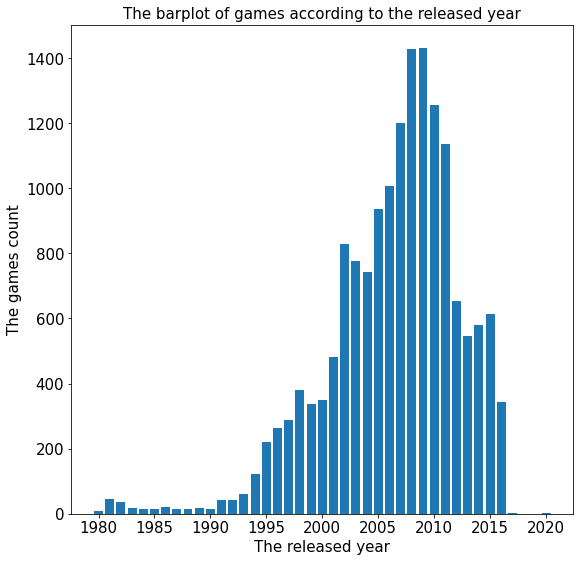

In [35]:
# Barplot of games according to the released year
plt.subplots(figsize = (9,9))
plt.bar(year_info.index,year_info)
plt.title('The barplot of games according to the released year',fontsize=15)
plt.xlabel('The released year',fontsize = 15)
plt.ylabel('The games count', fontsize = 15)
plt.show()

The 2009 year was the most popular by released games and after that goes 2008.  

In [16]:
# Now let's divide games by decades and see what's the most popular decade
decade = (df['Year']//10)*10
# Let's watch the distribution
decade.value_counts()

2000    9183
2010    5133
1990    1769
1980     205
2020       1
Name: Year, dtype: int64

Let's visualize that data using countplot.

Text(0, 0.5, 'Distribution')

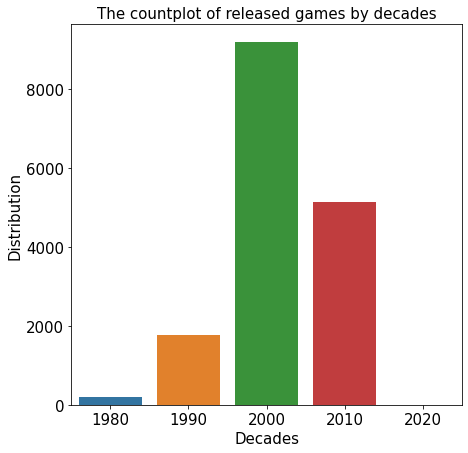

In [36]:
# Countplot of released games by decades
plt.subplots(figsize = (7,7))
sns.countplot(decade)
plt.title('The countplot of released games by decades', fontsize = 15)
plt.xlabel('Decades', fontsize = 15)
plt.ylabel('Distribution',fontsize = 15)

We can see, that the 2000 decade was the most frequent by releasing games and the least frequent is 2020, as it is just started. 

### 5.2 Q2: Distribution of the platforms according to the released games

In [18]:
# Displaying 'Platform' column
platform_df = df["Platform"]
platform_df

0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: Platform, Length: 16291, dtype: object

In [19]:
# Displaying the first five values of the Platform column
platform_df.head()

0    Wii
1    NES
2    Wii
3    Wii
4     GB
Name: Platform, dtype: object

In [20]:
# Displaying the last five values of the Platform column
platform_df.tail()

16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: Platform, dtype: object

In [21]:
# Descriptive statistics by 'Platform' column
platform_df.describe()

count     16291
unique       31
top          DS
freq       2131
Name: Platform, dtype: object

There is a 16291 rows of data with 31 unique platforms name. The most frequent platform is 'DS' with 2131 values respectively.

In [22]:
# The frequency of released games on each platform
platform_df.value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [23]:
# Descriptive statistics by platforms
platform_df.value_counts().describe()

count      31.000000
mean      525.516129
std       618.950072
min         1.000000
25%        39.500000
50%       239.000000
75%       870.500000
max      2131.000000
Name: Platform, dtype: float64

There are 31 platforms with 525 games per platform. There is a minimum of 1 game per platform and maximum with 2131 per platform.

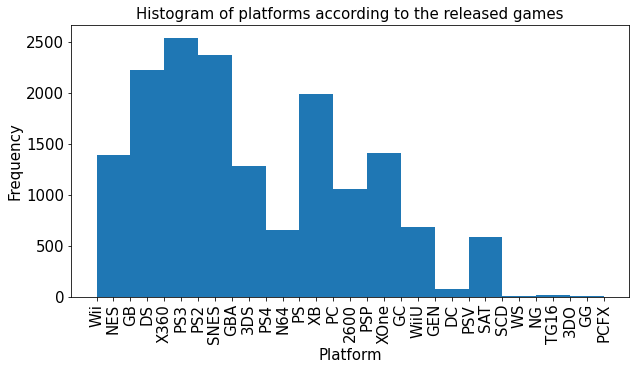

In [37]:
# Histogram of platforms according to the released games
plt.figure(figsize = (10,5))
plt.hist(platform_df, bins=15)
plt.xlabel("Platform", fontsize = 15)
plt.xticks(rotation='vertical')
plt.ylabel("Frequency",fontsize = 15)
plt.title("Histogram of platforms according to the released games", fontsize = 15)
plt.show()

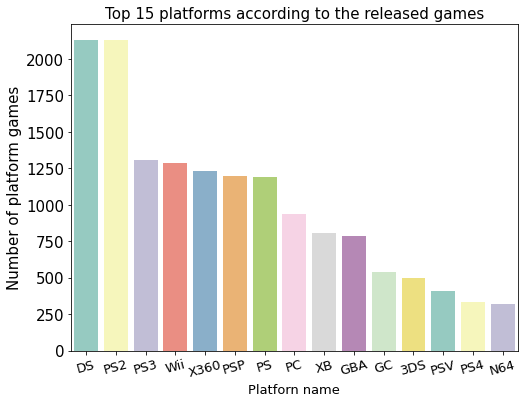

In [38]:
# Displays top 10 platforms by the number of games
# Counter() returns an unordered dictionary
# by using most_common() function we can sort it based on the counts of platform
pl = Counter(df['Platform'].tolist()).most_common(15)
plname = [name[0] for name in pl]
plcount = [name[1] for name in pl]

fig,ax = plt.subplots(figsize=(8,6))
# building a bar plot
sns.barplot(x=plname, y=plcount, ax=ax, palette = 'Set3')

# title and labels for axis
plt.title('Top 15 platforms according to the released games',fontsize=15)
plt.ylabel('Number of platform games',fontsize=15)
plt.xlabel('Platforn name', fontsize=13)
ticks = plt.setp(ax.get_xticklabels(),fontsize=13,rotation=15)

We can see that DS and PS2 are leaders by the released games.

### 5.3 Q3: Distribution of the games genres

In [26]:
# values of Genre column
v_counts = df['Genre'].value_counts()
# Descriptive statistics of Genre column
v_counts.describe()

count      12.000000
mean     1357.583333
std       768.065629
min       570.000000
25%       845.000000
50%      1249.500000
75%      1524.000000
max      3251.000000
Name: Genre, dtype: float64

There are 12 genres in the list. Also, there are 1358 games per one genre. The minimum games per genre is 570 and maximum games per genre is 3251 respectively.

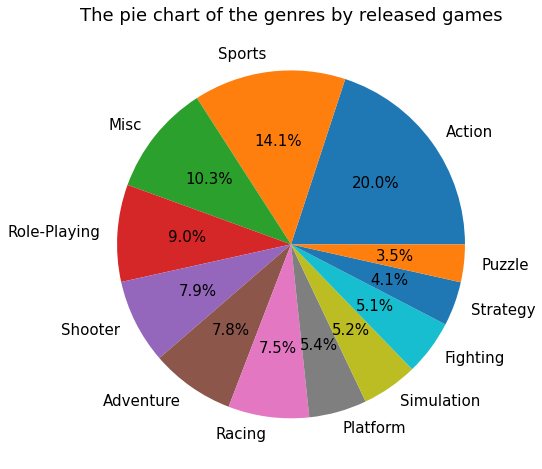

In [27]:
# The pie chart of the genres by released games
fig, ax = plt.subplots(figsize = (11,8))
plt.rcParams['font.size'] = 15.0
ax.pie(v_counts,labels = v_counts.index,autopct = '%.1f%%')
plt.title('The pie chart of the genres by released games')
plt.show()

We can see that Action genre is having the biggest part of pie which is 20 percent and the lowesr part of pie is Puzzle with 3.5% respectively.

In [28]:
# The sum of global sales and sales by sector grouped by genre
genre_per_sales = df.groupby('Genre').agg({'Global_Sales':'sum','NA_Sales':'sum','JP_Sales':'sum','EU_Sales':'sum'})
genre_per_sales

,Global_Sales,NA_Sales,JP_Sales,EU_Sales
Genre,,,,
Action,1722.84,861.77,158.65,516.48
Adventure,234.59,101.93,51.99,63.74
Fighting,444.05,220.74,87.15,100.00
Misc,789.87,396.92,106.67,211.77
Platform,829.13,445.99,130.65,200.65
Puzzle,242.21,122.01,56.68,50.52
Racing,726.76,356.93,56.61,236.31
Role-Playing,923.83,326.50,350.29,187.57
Shooter,1026.20,575.16,38.18,310.45


We can see that Action genre is giving the highest sales to publishers worldwide. The Action genre is very popular in North America and Europe, while in Japan role playing games are leading by sales.

### 5.4 Q4: Distribution of the global sales of games by years as well as overall sales comparison

In [29]:
# Data preparation for Q4

# apply groupby in order to find the same of all sales per year
year_sale = df.groupby(['Year'])['Global_Sales'].sum()
year_sale = year_sale.reset_index()

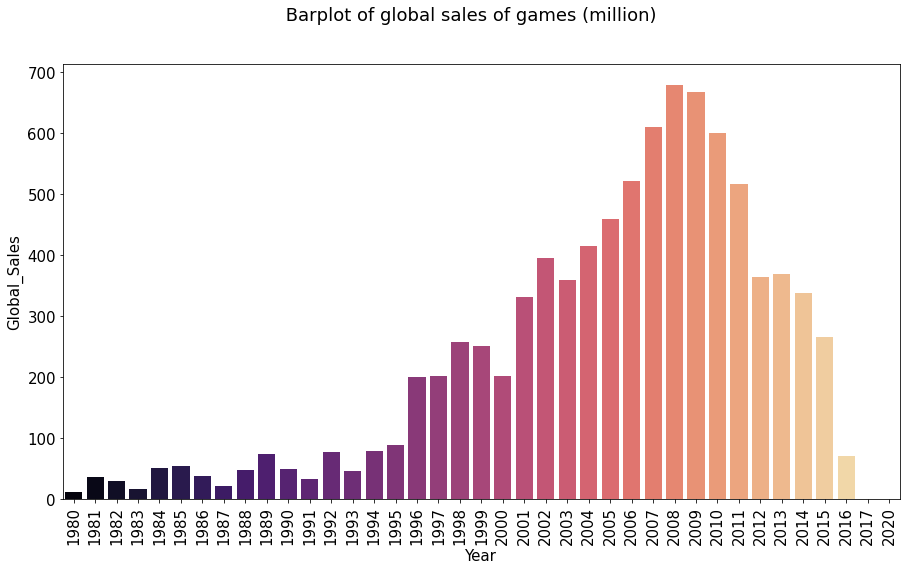

In [30]:
# Barplot of global sales of games
fig, ax = plt.subplots(figsize=(15,8), sharey=True)
ax.xaxis.set_tick_params(rotation=90)
plt.suptitle(' Barplot of global sales of games (million)')
sns.barplot(x=year_sale["Year"], y=year_sale["Global_Sales"], palette="magma", ax=ax)

The graph above focuses on the global sales of all games per year. The period with the highest sales rate corresponds to the of 2009 with about 700 million sales. Meanwhile, starting from the year of 2017 the rate of sales has decreased to less than a million.

In [31]:
# total sales in different regions

regions_sale = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
regions_sale = regions_sale.sum().reset_index()
regions_sale = regions_sale.rename(columns={"index": "region", 0: "sale"})
regions_sale

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


Text(0.5, 1.0, 'The barplot of sales in different regions.')

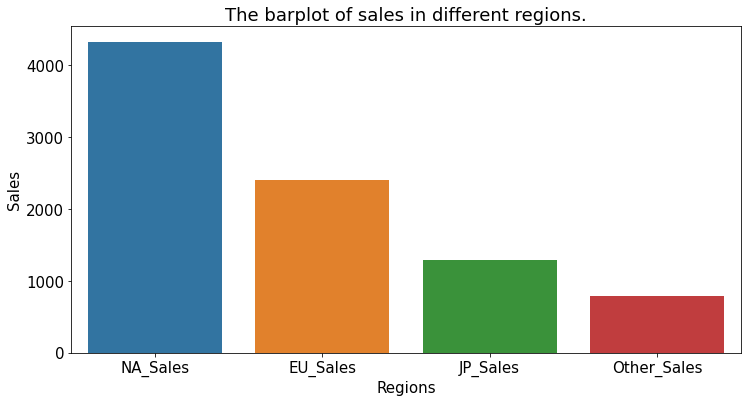

In [32]:
# sales in different regions
# Barplot of sales in different regions
plt.figure(figsize = (12,6))
ax = sns.barplot(x='region',y='sale',data=regions_sale)
plt.xlabel(xlabel='Regions')
plt.ylabel(ylabel='Sales')
plt.title('The barplot of sales in different regions.')

The barplot above clearly defines that North America has the leading position in overall world sales of games, which is also twice as much as European sales. The sales for the Japan and other regions are also shown above. 

### 5.5 Q5: Distribution of the highest number of games released by publisher

In [33]:
# group by publisher in order to count all
publishers = df.groupby(['Publisher']).count().iloc[:,0]
publishers = pd.DataFrame(publishers.sort_values(ascending=False))[0:10] # sort in desc order
publishers_ind = publishers.index
publishers.columns = ['Releases']

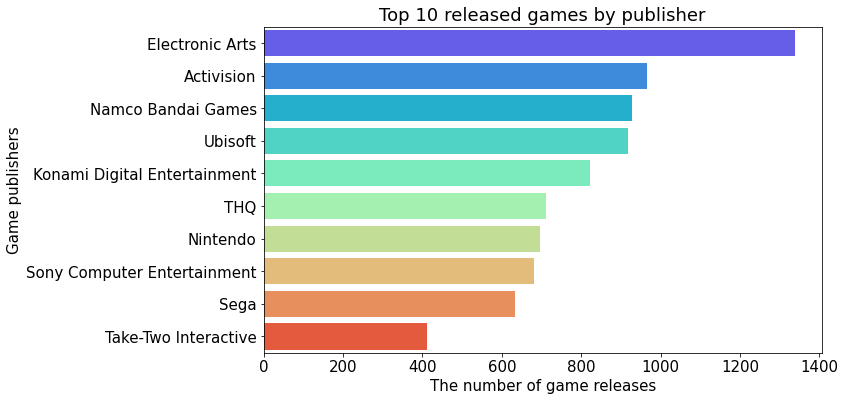

In [34]:
# Barplot of top 10 released games by publisher
plt.figure(figsize=(10,6))
ax = sns.barplot(y = publishers_ind, x = 'Releases', data=publishers, orient='horizontal', palette='rainbow')
ax.set_xlabel(xlabel='The number of game releases')
ax.set_ylabel(ylabel='Game publishers')
ax.set_title(label='Top 10 released games by publisher')
ax.set_yticklabels(labels = publishers_ind)
plt.show()

This plot focuses on the top ten game publishers over the whole period. We can easily conclude that 'The Electronic Arts' has released the highest number of games for the overall time. The publisher with the least frequency out of top 10 publishers of game releases is 'Take-Two Interactive'.

### 6. Conclusion

Finally, after doing the analysis we can make a conclusion about the video game sales.

First, there are 39 year history of video game sales, starting from 1980 and ending by 2020. The games released in 2009 and 2008 are more likely to have the highly sales distribution in comparison with others. Moreover, the games released in 2000 decade are having the highest sales distribution. 

Second, there are 31 platforms which release games, DS and PS2 are the top leaders by releasing games in their platforms and there are approximately 525 games per platform.  

Third, the given dataset consists of 12 genres. There are approximately 1358 games per one genre. The most popular type of genre is Action and this genre is the leader by global sales. Also, Action genre is popular in North America and Europe, while in Japan role playing games are leading by sales.

Fourth, the period with the highest sales is 2008, where there are 700 million sales worldwide. Overall, the North America is the leader in the overall world sales of games.  

Fifth, the leader over the whole period in publishing games goes to 'The Electronic Arts'.